Avtor: **Ivana Ristovska, 23190642**

Datum: 22. maj 2022

*Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjeval pogojev za pristop k izpitu.*

---

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Uvod" data-toc-modified-id="Uvod-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Uvod</a></span></li><li><span><a href="#Definicija-naloge---Ekstrahiranje-lastnosti-z-obdelavo-slik" data-toc-modified-id="Definicija-naloge---Ekstrahiranje-lastnosti-z-obdelavo-slik-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definicija naloge - Ekstrahiranje lastnosti z obdelavo slik</a></span></li><li><span><a href="#Uvoz-knjižnice" data-toc-modified-id="Uvoz-knjižnice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Uvoz knjižnice</a></span></li><li><span><a href="#Obdelava-podatkov" data-toc-modified-id="Obdelava-podatkov-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Obdelava podatkov</a></span></li><li><span><a href="#Simbolno-reševanje" data-toc-modified-id="Simbolno-reševanje-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simbolno reševanje</a></span><ul class="toc-item"><li><span><a href="#Preračun-povprečna-vrednost-pikselov" data-toc-modified-id="Preračun-povprečna-vrednost-pikselov-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preračun povprečna vrednost pikselov</a></span></li><li><span><a href="#Konvolucija" data-toc-modified-id="Konvolucija-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Konvolucija</a></span></li><li><span><a href="#Gaussova-maglica-(Gaussian-blur)" data-toc-modified-id="Gaussova-maglica-(Gaussian-blur)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Gaussova maglica (Gaussian blur)</a></span></li><li><span><a href="#Gaussova-funkcija" data-toc-modified-id="Gaussova-funkcija-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Gaussova funkcija</a></span></li></ul></li><li><span><a href="#Interpolacija" data-toc-modified-id="Interpolacija-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interpolacija</a></span></li><li><span><a href="#Iskanje-ničel" data-toc-modified-id="Iskanje-ničel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Iskanje ničel</a></span><ul class="toc-item"><li><span><a href="#Detektor-prehajanja-ničle-(Zero-Crossing-Detector)" data-toc-modified-id="Detektor-prehajanja-ničle-(Zero-Crossing-Detector)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Detektor prehajanja ničle (Zero Crossing Detector)</a></span></li><li><span><a href="#Laplacian-of-Gaussian" data-toc-modified-id="Laplacian-of-Gaussian-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Laplacian of Gaussian</a></span></li><li><span><a href="#Kako-deluje-detektor-prehajanja-ničle?" data-toc-modified-id="Kako-deluje-detektor-prehajanja-ničle?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Kako deluje detektor prehajanja ničle?</a></span></li></ul></li><li><span><a href="#Odvajanje" data-toc-modified-id="Odvajanje-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Odvajanje</a></span></li><li><span><a href="#Sistemi-linearnih-enačb" data-toc-modified-id="Sistemi-linearnih-enačb-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sistemi linearnih enačb</a></span></li></ul></div>

 ---

# Uvod

Slike definirajo svet, vsaka slika ima svojo zgodbo in vsebuje veliko ključnih informacij, ki so lahko uporabne na več načinov. Te informacije je mogoče pridobiti s pomočjo tehnike, znane kot obdelava slik.

   Obdelava slik je osrednji del računalniškega vida, ki igra ključno vlogo v številnih primerih iz resničnega sveta, kot so robotika, samovozeči avtomobili in zaznavanje predmetov. Obdelava slik nam omogoča, da preoblikujemo in manipuliramo na tisoče slik hkrati ter iz njih pridobimo koristne vpoglede.

   Podatki, ki jih zbiramo ali ustvarjamo, so večinoma neobdelani podatki z uporabo pythona in knjižnic, kot so Scikit-image, OpenCV, Matplotlib, NumPy itd. Najprej bi jih morali analizirati, izvesti potrebno predhodno obdelavo in nato uporabiti.

---

# Definicija naloge - Ekstrahiranje lastnosti z obdelavo slik

Spodnjo sliko lahko predstavimo kot 2D funkcijo F(x,y), kjer sta x in y prostorski koordinati. Amplituda F pri določeni vrednosti x,y je znana kot intenzivnost slike na tej točki. Če je x, y in je amplitudna vrednost končna, jo imenujemo digitalna slika. To je niz slikovnih pik, razporejenih v stolpce in vrstice. Piksli so elementi slike, ki vsebujejo informacije o intenzivnosti in barvi. Sliko lahko predstavimo tudi v 3D, kjer x, y in z postanejo prostorske koordinate. Pikseli so razporejeni v obliki matrike. To je znano kot slika RGB.

Slika 1 iz vira Google:
<img src="static/83659.jpg" width=250>

Tukaj ciljamo da uspešno naredimo:
* Rang, norma in pogojenost na matrika pikslov
* Gaussova zameglitev 
* Zaznavanje robov
* Homografije
* Histogram

vse z pomočjo:
* simbolno reševanje
* sistemi linearnih enačb
* interpolacija in aproksimacija
* iskanje ničel
* odvajanje

---

# Uvoz knjižnice

In [1]:
# %matplotlib notebook
from PIL import Image
from skimage import data, io
from skimage.exposure import histogram
from scipy.interpolate import UnivariateSpline
from scipy import optimize, ndimage, misc

import gaussModul
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math

---

# Obdelava podatkov

Da lahko manipuliramo z sliko bomo najprej pretvorili v numerično polje pikslov. Vsak piksel vsebuje tri vrednosti kar predstavljajo intenziteta na RGB. Vsako vrednost je med 0 in 255 ker so 8-bitna števila. 

In [2]:
img = Image.open('static/83659.jpg')
img_OpenCV = Image.open('static/openCV.png')

Pretvorba barvne slike v sivino s povprečjem vseh treh kanalov. Z uporabo oblike lastnosti lahko poizvedujemo po dimenzijah matrike. Upoštevamo, da ima barvna slika tri plasti, medtem ko ima slika v sivih odtenkih samo eno plast in ji manjka tudi tretja dimenzija.

Tip sivinska slika: float64


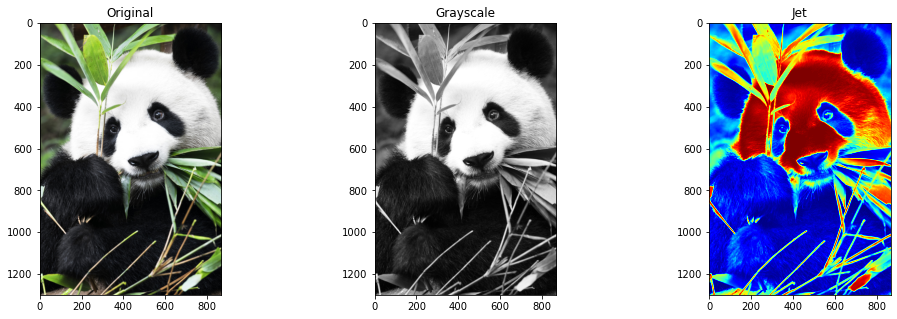

In [3]:
# Funkcija numpy.mean pretvori sliko v float64
gray_img = np.mean(img,2)
print(f'Tip sivinska slika: {gray_img.dtype}')

_, ax = plt.subplots(1, 3, figsize=(17, 5))

ax[0].imshow(img)
ax[0].set_title("Original")

# Če želimo sliko pravilno prikazati, jo moramo znova pretvoriti v uint8
ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

# Spremenite barvni zemljevid, da razlagate vrednosti drugače.
ax[2].imshow(gray_img, cmap=plt.cm.jet)
ax[2].set_title("Jet")

plt.show()

---

# Simbolno reševanje

## Preračun povprečna vrednost pikselov

Vsaka od slikovnih pik, ki predstavlja sliko shranjeno v računalniku opisuje kako svetla je ta slikovna pika in/ali kakšne barve mora biti. V najpreprostejšem primeru binarnih slik je vrednost slikovnih pik 1-bitna številka, ki označuje ospredje ali ozadje. Za slike v sivini je vrednost slikovnih pik ena sama številka, ki predstavlja svetlost slikovne pike. Najpogostejši format slikovnih pik je slika bajta, kjer je to število shranjeno kot 8-bitno celo število, ki daje razpon možnih vrednosti od 0 do 255. Običajno je nič črna, 255 pa bela. Vmesne vrednosti sestavljajo različne odtenke sive.

S pomočjo silmbolnom rešavanje bomo poračunali popvrečno vrednost na pikselov v sliki. Število bomo zaokrožili na celo število da lahko dobimo povprečna barva na sliki.

Najprej bomo prebrali sliko od datoteko in poiščemo njeno višino in širino.

In [4]:
temporary_gray_image = np.mean(io.imread("static/83659.jpg"),2)

gray_height, gray_width = temporary_gray_image.shape
print(f'Višina: {gray_height}\nŠirina: {gray_width}')

Višina: 1300
Širina: 867


Z ugnezdene for zankov (ena v x smeri, druda v y smeri) bomo iterirali nad vrednostmi od slikovnih pikah. 
Vsako vrednost bomo dodajali v prej definiran prazan array z funkcijo append. 

Nad celotno nizo poiščemo sumo in skupno število vrednosti v nizu.

In [5]:
pixelValues = []
for y in range(0, gray_height):
    for x in range(0, gray_width):
        pixelValues.append(temporary_gray_image[y, x])

pixelValues = np.array(pixelValues)

sumValues = pixelValues.sum()
totalValues = pixelValues.size

print(f'Suma vsih slikovnih pikselov: {sumValues}\nSkupno število vrednosti v nizu {totalValues}')

Suma vsih slikovnih pikselov: 110937765.66666664
Skupno število vrednosti v nizu 1127100


In [6]:
m, x, y, i, t = sym.symbols('Mean, pixelValue, pixelValues, i, totalValues')
f = sym.Sum(x, (i, 0, t))

equation = sym.Eq(m, f/t)
equation

Eq(Mean, Sum(pixelValue, (i, 0, totalValues))/totalValues)

In [7]:
p_t = y/t
equation_m = sym.Eq(m, p_t.subs({y: sumValues, t: totalValues}))

meanPixel= sym.solve(equation_m, m)
meanPixel = int(meanPixel[0])
print(f'Povprečna vrednost slikovnih pikselov je: {meanPixel}')

Povprečna vrednost slikovnih pikselov je: 98


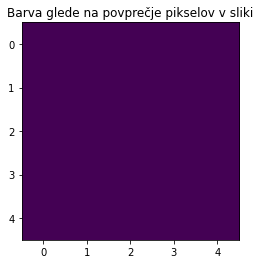

In [8]:
barva = np.ones((5,5))
barva = barva*meanPixel

plt.figure()
plt.imshow(barva)
plt.title('Barva glede na povprečje pikselov v sliki')
plt.show()

## Konvolucija

Konvolucija je preprost postopek, v katerem vzamemo majhno matriko, imenovano "kernel", in jo izvedemo po vseh slikovnih pikah na sliki. Pri vsaki slikovni piki bomo izvedli matematično operacijo, ki vključuje vrednosti v konvolucijski matriki in vrednosti slikovne pike in njene okolice. Na ta način določimo vrednost za slikovni pik v izhodni sliki.

Slika 2 iz vira Google:
<img src="static/convolution.png" width=250>

## Gaussova maglica (Gaussian blur)

Gaussova meglica, ki se sicer imenuje Gaussovo glajenje, je posledica zakrivanja slike z uporabo Gaussove zmogljivosti.

Uporablja se za zmanjšanje hrupa slike in zmanjšanje podrobnosti. Posebna vizualizacija te strategije zakrivanja je kot gledanje slike skozi jasen zaslon. Vedno znova se uporablja v PC viziji za izboljšanje slike v različnih obsegih ali kot metoda za povečanje informacij pri poglobljenem učenju.

Gaussova maglica uporablja Gaussovo funkcijo (ki izraža tudi normalno porazdelitev v statistiki) za izračun transformacije za vsako slikovno piko na sliki. 

Gaussov kernel, kot pove že ime, ima obliko funkcije 'Gaussova porazdelitev' za definiranje uteži znotraj kernela(jedra), ki se uporabljajo za izračun tehtanega povprečja sosednjih točk (pikslov) na sliki.

Z drugimi besedami, vsaka vrednost v Gaussovem filtru je iz ničelne srednje Gaussove porazdelitve. Ena stvar, ki jo moramo upoštevati, je, da je velikost kernela odvisna od standardnega odmika 𝛔 Gaussove funkcije.

Formula Gaussove funkcije v eni dimenziji je:

$$G(x)=\frac{1}{\sqrt{2\pi\sigma^2}}{e^\frac{-x^2}{2\sigma^2}}$$

V dveh dimenzijah je produkt dveh takšnih Gaussovih funkcij, po ena v vsaki dimenziji:

$$G(x,y)=\frac{1}{2\pi\sigma^2}{e^\frac{-x^2+y^2}{2\sigma^2}}$$

Spodaj je 2D predstavitve Gaussovo distribucijo. Upoštevajte, da je v središču vrh in da se krivulja poravna, ko se premikate proti robom.

Slika 3 iz vira Google:
<img src="static/Gauss.PNG" width=350>

Predstavljajte si, da je ta porazdelitev prekrita s skupino slikovnih pik na sliki. Če pogledamo graf bi moralo biti očitno, da če bi vzeli tehtano povprečje vrednosti slikovnih pik in višine krivulje na tej točki, bi piksli v središču skupine najbolj prispevali k nastali vrednosti. Tako v bistvu deluje Gaussova zamegljenost.

## Gaussova funkcija

V procesu uporabe Gaussovega filtra na sliki najprej določimo velikost kernela / matrike, ki bi bila uporabljena za razgradnjo slike. Velikosti so na splošno lihe številke, kar pomeni, da se skupni rezultati lahko izračunajo na osrednjem pikslu. Tudi jedra so simetrična in zato imajo enako število vrstic in stolpcev. Vrednosti znotraj jedra se izračunajo z Gaussovo funkcijo, ki je naslednja:

$$G(x,y)=\frac{1}{2\pi\sigma^2}{e^\frac{-x^2+y^2}{2\sigma^2}}$$

x - x koordinatna vrednost

y - y koordinatna vrednost

𝛔 - standardni odklon

Z simbolično rešavanje poračunamo Gaussova kernel matrika.

In [9]:
sym.init_printing()

G = sym.Function('G')
sigma, x, y = sym.symbols('sigma, x, y')

#enačba_gauss1D = (1/(sym.sqrt(2 * sym.pi * sigma**2)) * sym.exp(-x**2 / (2 * sigma**2)))
enačba_gauss2D = (1 / (2*sym.pi*sigma**2)) * sym.exp((-x**2+y**2) / (2*sigma**2))

gauss2D_hitra = sym.lambdify((x, y, sigma), enačba_gauss2D, modules='numpy')
gauss2D_hitra

<function _lambdifygenerated(x, y, sigma)>

Z uporabo zgornje funkcije je mogoče izračunati gaussov kernel katere koli velikosti, tako da mu zagotovite ustrezne vrednosti. Izberemo gaussov kernel 5×5 (dvodimenzionalni) s standardnim odklonom = 5 da bi rezultati bili bolj vidni.

In [10]:
Sigma = 5
kernel=[]

for m in range(-2,3):
    for k in range(-2,3):
        value = gauss2D_hitra(m, k, Sigma)
        kernel.append(value)
        
kernel = np.array(kernel)
print(f'Kernel matrike iz Gauss funkcije:\n\n{np.reshape(kernel, [5,5])}')

Kernel matrike iz Gauss funkcije:

[[0.0063662  0.00599546 0.00587674 0.00599546 0.0063662 ]
 [0.00675986 0.0063662  0.00624014 0.0063662  0.00675986]
 [0.00689642 0.0064948  0.0063662  0.0064948  0.00689642]
 [0.00675986 0.0063662  0.00624014 0.0063662  0.00675986]
 [0.0063662  0.00599546 0.00587674 0.00599546 0.0063662 ]]


Bom definirala funkcija create_matrix5 katera bi predstavljala segment iz matrike slikovnih pikslov velikosti 5x5. V teoriji to je matrika, v naši praksi pa je numerično polje od 25 elementov s tem da lažje množimo med polja.

Ta funkcija bi iterirala skozi vse vrednosti slikovnih pikslov v x in v y smer, vrednosti pa se bojo spreminjali sproti. 

Ker imamo veliko sliko, potrebujemo veliko časa za preračun za novo sliko. Zaradi tega bomo obstoječo sliko skrajšali.  

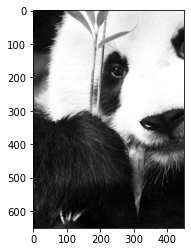

Nova višina:650
Nova širina: 450


In [11]:
h = temporary_gray_image.shape[0]
w = temporary_gray_image.shape[1]

# Definiranje točke za reženje
left = 100
top = h / 4
right = 550
bottom = 3 * h / 4

img_crop = img.crop((left, top, right, bottom))

gray_img_crop = np.mean(img_crop,2)
plt.figure()
plt.imshow(gray_img_crop,cmap=plt.cm.gray)
plt.show()

tmp_img = gray_img_crop.copy() 

h_crop = tmp_img.shape[0]
w_crop = tmp_img.shape[1]
print(f'Nova višina:{h_crop}\nNova širina: {w_crop}')

Zdaj imamo vse ka nam je potrebno da uporabimo Gaussov filter za meglica. 

Preko animacij je prikazano kako se piksel matrika premika skozi našo sliko in zračuna nove vrednosti.

Animacija 1 iz vira Google:
<img src="static/9OZKF.gif" width=700>

GAUSS BLUR START
Using gauss2D from gaussModul.py...
gauss2D successfully applied
DONE


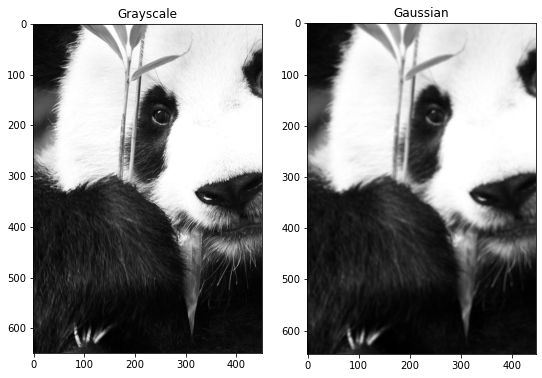

In [12]:
print("GAUSS BLUR START")

new_img = gaussModul.gauss2D(tmp_img, kernel)

_, ax = plt.subplots(1, 2, figsize=(9, 30))

ax[0].imshow(tmp_img, cmap=plt.cm.gray)
ax[0].set_title("Grayscale")

ax[1].imshow(new_img, cmap=plt.cm.gray)
ax[1].set_title("Gaussian")

print("DONE")

Opazimo da drugo sliko je zamagljeno. Da bi še bolj opazili razliko bomo uvozili še eno sliko na katero ima tekst in ponovno primerjamo rezultate.

GAUSS BLUR START
Using gauss2D from gaussModul.py...
gauss2D successfully applied
DONE


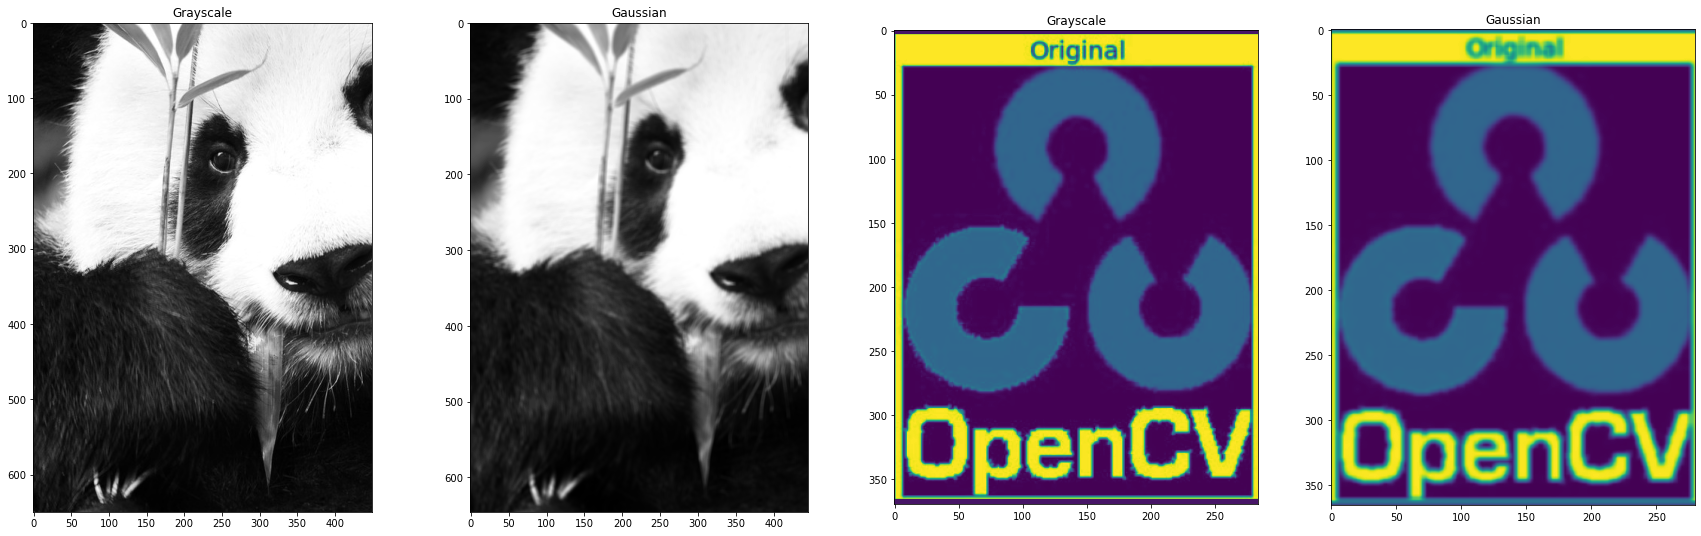

In [13]:
print("GAUSS BLUR START")

gray_openCV = np.mean(img_OpenCV,2)

new_openCV = gaussModul.gauss2D(gray_openCV, kernel)

_, ax = plt.subplots(1, 4, figsize=(30, 9))

ax[0].imshow(tmp_img, cmap=plt.cm.gray)
ax[0].set_title("Grayscale")

ax[1].imshow(new_img, cmap=plt.cm.gray)
ax[1].set_title("Gaussian")

ax[2].imshow(gray_openCV)
ax[2].set_title("Grayscale")

ax[3].imshow(new_openCV)
ax[3].set_title("Gaussian")

print("DONE")

Vidimo da naša metoda deluje in smo dobili željeno sliko ko smo vstavili Gaussov filter.

---

# Interpolacija

Interpolacija slike poskuša doseči najboljšo oceno intenzivnosti slikovne pike na podlagi vrednosti sosednjih slikovnih pik na osnovi bližine. Interpolacija je še posebej pomembna kadar se izvaja spreminjanje velikosti ali vzorčenje slike, da se izpolnijo specifikacije prenosnega kanala ali da se končna slika predstavi brez izgube vida. Interpolacija slike se običajno doseže z eno od treh metod: najbližji sosed, bilinearna interpolacija ali bikubična interpolacija. Ker ima vsaka metoda svoje prednosti in izzive, je izbira ustrezne metode odvisna od stanja stvari.

S pomočjo InterpolatedUnivariateSpline bomo interporirali vrednosti pikslov v sliki.

Pri inicializaciji objekta InterpolatedUnivariateSpline moramo posredovati interpolacijske točke x in y. Argument k s privzeto vrednostjo k=3 definira red intepolacijskega zlepka (1<=k<=5). Pomemben opcijski parameter je tudi w, ki definira uteži posameznim interpolacijskim točkam (uporabimo ga, če želimo določenim področjem dati večji poudarek).

In [14]:
gray_img = gray_img.astype(np.uint8)
hvalues_gray, hbins_gray = histogram(gray_img, nbins=256, source_range='dtype', normalize=False)

In [15]:
spl_p = UnivariateSpline(hbins_gray,hvalues_gray)
p_g = np.linspace(np.min(hbins_gray), np.max(hbins_gray), 100)

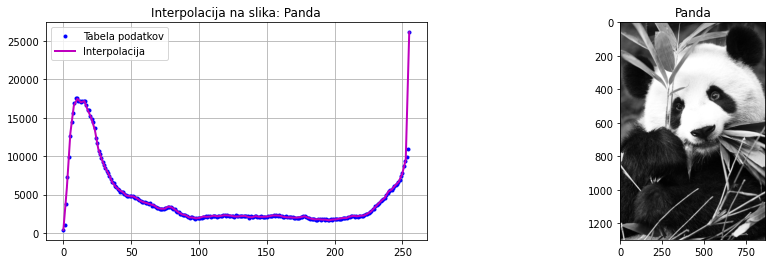

In [16]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title('Interpolacija na slika: Panda')
ax[0].plot(hbins_gray, hvalues_gray, 'bo', ms=3, label='Tabela podatkov')
ax[0].plot(p_g, spl_p(p_g),'m', lw=2, label='Interpolacija')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Panda')
ax[1].imshow(gray_img, cmap = plt.cm.gray)


Najprej bomo uvozili še eno sliko da lažje primerjamo izhodne podatke. Upoštevati moramo da originalno sliko z pando je 90% črno bela, medtem slika z tovornjaki vključuje več različnih barv.

Slika 3: Tovornjaki   
<img src="static/trucks.jpg" width=500>

Da lahko delamo z pikselov od sliki moramo najprej pretvoriti v sivisko sliko od tip np.unit8 (nepodpisano 8-bitno celo število, ki lahko predstavlja vrednosti od 0 do 255)

In [17]:
trucks_img = np.mean(io.imread("static/trucks.jpg"), 2).astype(np.uint8)
hvalues_trucks, hbins_trucks = histogram(trucks_img, nbins=256, source_range='dtype', normalize=False)

In [18]:
spl_t = UnivariateSpline(hbins_trucks,hvalues_trucks)
t_g = np.linspace(np.min(hbins_trucks), np.max(hbins_trucks), 100)

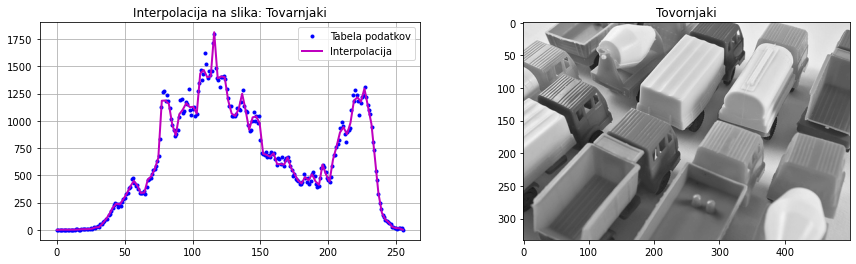

In [19]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title('Interpolacija na slika: Panda')
ax[0].plot(hbins_trucks,hvalues_trucks, 'bo', ms=3, label='Tabela podatkov')
ax[0].plot(t_g, spl_t(t_g),'m', lw=2, label='Interpolacija')
ax[0].set_title('Interpolacija na slika: Tovarnjaki')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Tovornjaki')
ax[1].imshow(trucks_img, cmap = plt.cm.gray)

<BarContainer object of 256 artists>

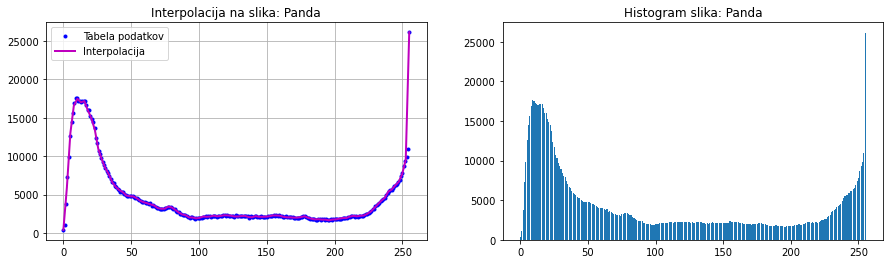

In [20]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title('Interpolacija na slika: Panda')
ax[0].plot(hbins_gray, hvalues_gray, 'bo', ms=3, label='Tabela podatkov')
ax[0].plot(p_g, spl_p(p_g),'m', lw=2, label='Interpolacija')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Histogram slika: Panda')
ax[1].bar(hbins_gray, hvalues_gray) 


<BarContainer object of 256 artists>

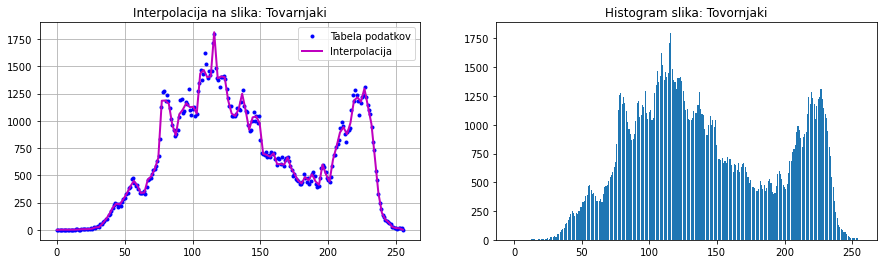

In [21]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title('Interpolacija na slika: Panda')
ax[0].plot(hbins_trucks,hvalues_trucks, 'bo', ms=3, label='Tabela podatkov')
ax[0].plot(t_g, spl_t(t_g),'m', lw=2, label='Interpolacija')
ax[0].set_title('Interpolacija na slika: Tovarnjaki')
ax[0].legend()
ax[0].grid()

ax[1].set_title('Histogram slika: Tovornjaki')
ax[1].bar(hbins_trucks, hvalues_trucks) 

Na zgornje slike smo predstavili primerjava med interpoliranje intenziteta pisklov z histogram nad naše slike. 

---

# Iskanje ničel

## Detektor prehajanja ničle (Zero Crossing Detector)

Detektor prehajanja ničle išče mesta v Laplacianu slike, kjer vrednost Laplaciana prehaja skozi nič oziroma točke, kjer Laplacian spremeni predznak. Takšne točke se pogosto pojavljajo na "robih" na slikah. Pri takšne točke se intenzivnost slike hitro spreminja, pojavljajo pa se tudi na mestih, ki jih ni tako enostavno povezati z robovi. Najbolje je, da si o detektorju prečkanja ničle razmišljamo kot o nekakšnem detektorju značilnosti in ne kot o posebnem detektorju robov. Prečkanja ničle vedno ležijo na zaprtih konturah, zato je izhod detektorja ničelnega prečkanja običajno binarna slika s črtami debeline enojnih slikovnih pik, ki prikazujejo položaje ničelnih prečkanj.

Začetna točka za detektor prehajanja ničle je slika, ki je bila filtrirana z uporabo Laplacian of Gaussovega filtra. Na prehajanje ničel, ki nastanejo, močno vpliva velikost Gaussovega, uporabljenega za stopnjo glajenja tega operaterja. Ko se glajenje poveča, bo najdenih vse manj kontur ki prečkajo ničlo. Tiste ki ostanejo bodo ustrezale značilnostim vse večjega in večjega obsega na sliki.

## Laplacian of Gaussian

Laplacian je 2-D izotropna mera 2. prostorske izpeljanke slike. Laplacian slike poudari področja hitre spremembe intenzivnosti in se zato pogosto uporablja za zaznavanje robov (glej detektorje robov ničle). Operater običajno vzame eno sliko sivine kot vhod in ustvari drugo sliko sivine kot izhod.

Funkcija 2-D LoG s središčem na nič in z Gaussovim standardnim odklonom 𝜎 ima obliko:

$$LoG(x,y)=-\frac{1}{\pi\sigma^4} \left [1-\frac{x^2+y^2}{2\sigma^2} \right ] {e^\frac{-x^2+y^2}{2\sigma^2}}$$

in je prikazano spodnji sliki:

Slika 4: 2-D Laplacian Gaussove funkcije (LoG)   
<img src="static/LoG.PNG" width=500>

$$L(x,y)=\frac{\partial^2 I}{\partial x^2} + {\frac{\partial^2 I}{\partial y^2}}$$

Ker Laplacian kernel aproksimira drugi odvod, so zelo občutljiva na šum. Da bi se temu izognili, je slika zglajena z pomočjo Gaussovo metodo, preden se uporabi Laplacian filter. Ta korak predhodne obdelave zmanjša visokofrekvenčne komponente hrupa pred korakom diferenciacije.

Zato mi bomo vzeli predhodno obdelano sliko z Gaussovo magljenko in na njo bi aplicirali Laplacian filter.

Text(0.5, 1.0, 'Laplacian of Gaussian')

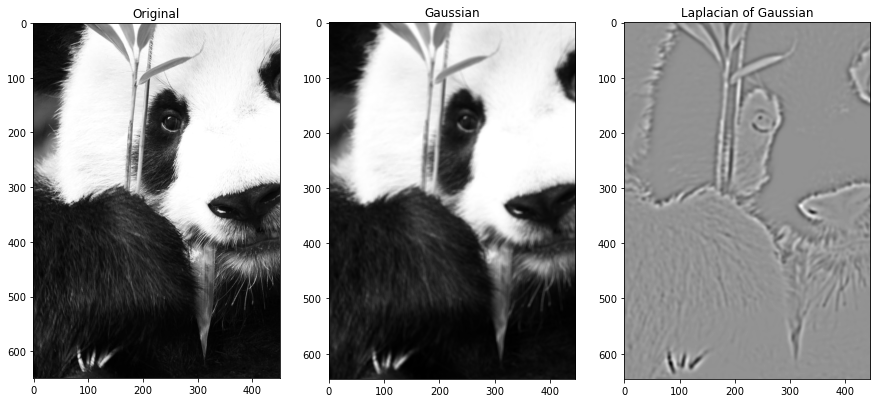

In [22]:
laplacian = ndimage.gaussian_laplace(new_img, sigma=3)

_, ax = plt.subplots(1, 3, figsize=(15, 30))

ax[0].imshow(gray_img_crop, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(new_img, cmap=plt.cm.gray)
ax[1].set_title("Gaussian")

ax[2].imshow(laplacian, cmap=plt.cm.gray)
ax[2].set_title("Laplacian of Gaussian")

## Kako deluje detektor prehajanja ničle?

Operater LoG izračuna drugo prostorsko izpeljanko slike. To pomeni, da bo na območjih, kjer ima slika konstantno intenzivnost (oz. kjer je gradient intenzivnosti nič), odziv LoG enak nič. V bližini spremembe intenzivnosti pa bo odziv LoG pozitiven na temnejši strani in negativen na svetlejši strani. To pomeni, da bo na razmeroma ostrem robu med dvema območjema enakomerne, vendar različne intenzivnosti odziv LoG:
- nič na dolgi razdalji od roba,
- pozitivno samo na eni strani roba,
- negativna samo na drugi strani roba,
- nič na neki vmesni točki, na samem robu.

Slika 5: Odziv 1-D LoG filtra na rob koraka(levo samo LoG filtera, desno LoG filter s Gaussian):    
<img src="static/OdzivLog.PNG" width=500>

Ničelni prehodi se pojavijo tudi na katerem koli mestu, kjer se gradient intenzivnosti slike začne povečevati ali zmanjševati, kar se lahko zgodi na mestih, ki niso očitno robovi. Ko je slika filtrirana po LoG, ostane le zaznati prehode ničle.

Nas ne zanima, na katerih mestah se pojavljajo ničle. Mi jih bomo poiskali samo na en mal segment iz sliko. Bomo vzeli en del iz prvo vrstico iz matriko slikovnih pikah. Te podatke bomo aproksimirali in bi dobili polinomsko funkcijo da lahko vstavimo v Newton metodo. Rezultat je seznam lokacije od naše ničelni prehode.

In [23]:
x_segment = np.array([i for i in range(50, 101)])
y_vrednost = laplacian[0][50:101]

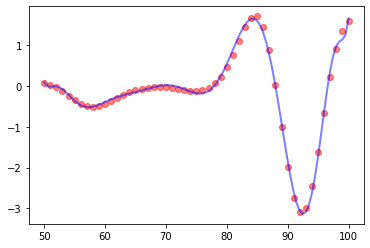

Iz grafa določimo kje se pojavijo naše ničle in njihove vrednosti so:
[50.44826334 68.92696813 68.92699941 87.98584865 96.5755983 ]


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


In [24]:
koef = np.polyfit(x_segment, y_vrednost, deg=12)
polinom = np.poly1d(koef)
_g = np.linspace(np.min(x_segment), np.max(x_segment), 100)

plt.figure()
plt.plot(x_segment, y_vrednost,'ro', lw=2, alpha=0.5)
plt.plot(_g, polinom(_g),'b', lw=2, alpha=0.5, label='Aproksimacija s polinomsko funkcijo')
plt.show()

ničle = optimize.newton(func=polinom, x0=[50,60,70,90,100], tol=1.e-8)
print(f'Iz grafa določimo kje se pojavijo naše ničle in njihove vrednosti so:\n{ničle}')

---

# Odvajanje

Gaussovo metodo smo že spoznali. Bomo vzeli formula Gaussove funkcije v eni dimenziji:

$$G(x)=\frac{1}{\sqrt{2\pi\sigma^2}}{e^\frac{-x^2}{2\sigma^2}}$$

In jo bomo aplicirali za x in y smer, potem bomo odvajali z pomoč np.gradient() funkcijo.  

In [25]:
G = sym.Function('G')
sigma, x, y = sym.symbols('sigma, x, y')

Sigma = 5
X, h = np.linspace(-2, 2, 5, retstep = True)
Y = X

print(f'Vrednosti za x in y:{X}\n')

Vrednosti za x in y:[-2. -1.  0.  1.  2.]



In [26]:
enačba_gauss1Dx = (1/(sym.sqrt(2 * sym.pi * sigma**2)) * sym.exp(-x**2 / (2 * sigma**2)))

gauss1D_hitraX = sym.lambdify((x, sigma), enačba_gauss1Dx, modules='numpy')
gauss1D_X = gauss1D_hitraX(X, Sigma)
print(f'Pred odvajanja:\n{gauss1D_X}\n')

dx = np.gradient(gauss1D_X, X, edge_order=2)

matrix_X = dx.reshape(1, 5)
print(f'Vrednosti kernela v x-smeri:\n{matrix_X}')

Pred odvajanja:
[0.07365403 0.07820854 0.07978846 0.07820854 0.07365403]

Vrednosti kernela v x-smeri:
[[ 0.00604181  0.00306721  0.         -0.00306721 -0.00604181]]


In [27]:
enačba_gauss1Dy = (1/(sym.sqrt(2 * sym.pi * sigma**2)) * sym.exp(-y**2 / (2 * sigma**2)))

gauss1D_hitraY = sym.lambdify((y, sigma), enačba_gauss1Dy, modules='numpy')

gauss1D_Y = gauss1D_hitraY(Y, Sigma)
print(f'Pred odvajanja:\n{gauss1D_X}')

dy = np.gradient(gauss1D_Y, Y, edge_order=2)

matrix_Y = dy.reshape(5,1)
print(f'\nVrednosti kernela v x-smeri:\n{matrix_Y}')

Pred odvajanja:
[0.07365403 0.07820854 0.07978846 0.07820854 0.07365403]

Vrednosti kernela v x-smeri:
[[ 0.00604181]
 [ 0.00306721]
 [ 0.        ]
 [-0.00306721]
 [-0.00604181]]


Ko dobimo vrednoste za x-matriko in y-matriko bomo obe matrike pomnožili da lahko generiramo novi Gaussov kernel.

In [28]:
gauss_kernel = matrix_X * matrix_Y
print(f'Gausov kernel na odvajano funkcijo:\n\n{gauss_kernel}')

Gausov kernel na odvajano funkcijo:

[[ 3.65034374e-05  1.85315165e-05  0.00000000e+00 -1.85315165e-05
  -3.65034374e-05]
 [ 1.85315165e-05  9.40780178e-06  0.00000000e+00 -9.40780178e-06
  -1.85315165e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-1.85315165e-05 -9.40780178e-06 -0.00000000e+00  9.40780178e-06
   1.85315165e-05]
 [-3.65034374e-05 -1.85315165e-05 -0.00000000e+00  1.85315165e-05
   3.65034374e-05]]


In [29]:
gray_img_gradient = gaussModul.gauss2D(tmp_img, kernel)

Using gauss2D from gaussModul.py...
gauss2D successfully applied


Text(0.5, 1.0, 'Prvi odvod od Gaussian')

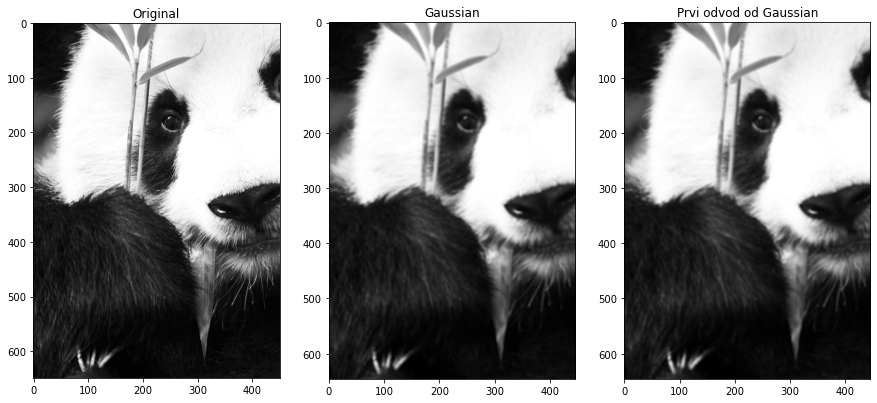

In [30]:
_, ax = plt.subplots(1, 3, figsize=(15, 30))

ax[0].imshow(gray_img_crop, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(new_img, cmap=plt.cm.gray)
ax[1].set_title("Gaussian")

ax[2].imshow(gray_img_gradient, cmap=plt.cm.gray)
ax[2].set_title("Prvi odvod od Gaussian")

Iz slike ne opazimo prevelika razlika poleg tega da smo aplicirali tudi prvi odvod Gaussovega filtra. 

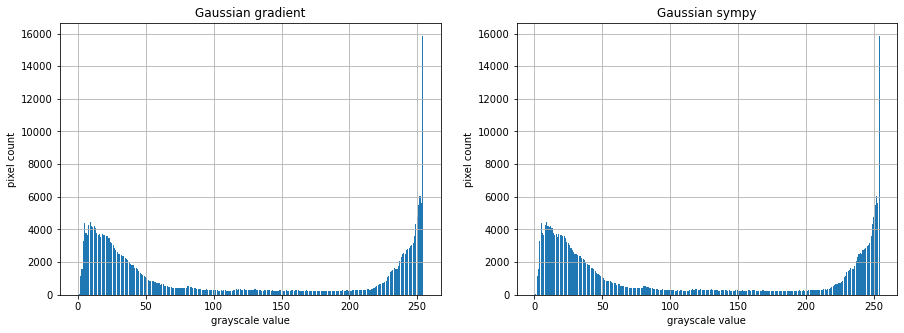

In [31]:
gauss_values, gauss_bins = np.histogram(new_img, bins=256, range=(0, 255))
gradient_values, gradient_bins = np.histogram(gray_img_gradient, bins=256, range=(0, 255))
_, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(gauss_bins[0:-1], gauss_values)
ax[0].set_title("Gaussian gradient")
ax[0].set_xlabel('grayscale value')
ax[0].set_ylabel('pixel count')
ax[0].grid()

ax[1].bar(gradient_bins[0:-1], gradient_values)
ax[1].set_title("Gaussian sympy")
ax[1].set_xlabel('grayscale value')
ax[1].set_ylabel('pixel count')
ax[1].grid()

Za primerjavo smo podali histogram na naše slike in iz njega tudi opazimo da so razlike minimalne.

---

# Sistemi linearnih enačb 

Da bi v naši nalogi zagotovili sistem linearnih enačb, smo pripravili in uporabili homografijo z dvema primernima slikama.

Homografija je bijektivna transformacija med dvema projekcijskima prostoroma, v našem primeru ravninama. Prva ravnina je ravnina izvorne slike, druga ravnina pa je definirana z vstopnimi točkami, ki označujejo območje, v katerega želimo vdelati izvorno sliko.

Homografija je opisana z matriko, v primeru transformacije med dvema ravninama ima dimenzijo 3 × 3.

Da bi lahko še osebno stestirali, zaženite spodnjo celico in definirate  štiritočkovni poligon. Tukaj smo definirali dinamični interativni vmesnik s pomočjo na "onclick event".  Priporočljivo je, da izberete štiri točke, ki ustrezajo kotom reklamni deski na sliki. Določite ustrezen vrstni red točk (na primer začnite v zgornjem desnem kotu in nadaljujte v nasprotni smeri urinega kazalca). Nato zaženite naslednja celica ki bo prikazala vaša selekcija.

<IPython.core.display.Javascript object>


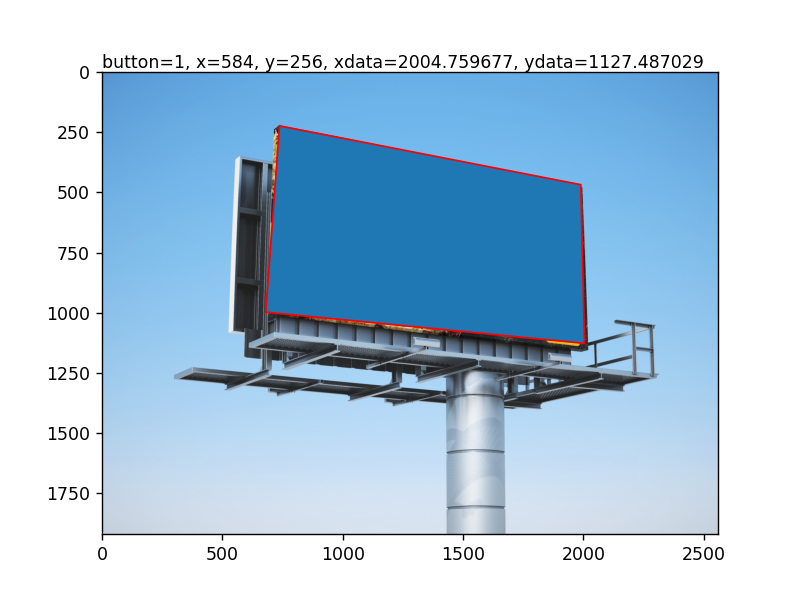

In [35]:
%matplotlib notebook

homography_input = Image.open("static/billboard.jpg")
p2 = []
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(homography_input)
text=ax.text(0,0, "", va="bottom", ha="left")
plt.show()

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    xyz = (event.xdata, event.ydata)
    p2.append(xyz)
    text.set_text(tx)

# Ustvarite trden sklic na povratni klic, ki ga zbiralnik smeti ne počisti
ka = fig.canvas.mpl_connect('button_press_event', onclick)


In [36]:
# Pretvori točke v oglišča koordinat x in y
xs, ys = zip (*p2) 
plt.fill(xs, ys, edgecolor='r', fill=True)
print(p2)
plt.show()

[(680.0843521712665, 997.6168989701705), (737.2272093141236, 223.59092494419656), (1989.1752612621758, 467.74676910004064), (2004.7596768465914, 1127.4870288403004)]


$$p'_b = H_{ab} p_a$$

$$\begin{bmatrix} w^{\prime}x_b\\w^{\prime}y_{b}\\w^{\prime}\end{bmatrix} =\begin{bmatrix} h_{11}&h_{12}&h_{13}\\h_{21}&h_{22}&h_{23}\\h_{31}&h_{32}&h_{33}\end{bmatrix} \begin{bmatrix}x_a\\y_a\\1\end{bmatrix}$$

In [37]:
def estimate_homography(p1, p2):
    """ Vrne homografska matrika H

    * p1 koordinate od izvorne slike 
    * p2 koordinate od selektivni zaslon na reklamni deski od ciljne slike
    """
    A = np.zeros((8,9))
    # Homografska matrika
    for i in range(4): # Uporaba vogalov
            A[i*2,:] = [ p1[i][0], p1[i][1], 1, 0, 0, 0, -p2[i][0]*p1[i][0], -p2[i][0]*p1[i][1], -p2[i][0] ]
            A[i*2+1,:] = [0, 0, 0, p1[i][0], p1[i][1], 1, -p2[i][1]*p1[i][0], -p2[i][1]*p1[i][1], -p2[i][1] ]

    [U,S,V] = np.linalg.svd(A)
    return np.reshape(V[-1,:],(3,3))

# Testiranje funkcije z random podatke
p1 = [(0, 0), (100, 0), (100, 100), (0, 100)]

H = estimate_homography(p1, p2)

print(H)

[[ 8.42752528e-04  1.42180049e-02  5.63204327e-01]
 [-6.29793693e-03  2.90211403e-03  8.26165390e-01]
 [ 5.01243414e-07  1.62007090e-06  8.28138929e-04]]


Kot je razvidno iz zgornjih enačb, je nastala točka 𝑝′𝑏 v homogeni obliki, torej preden lahko uporabimo njene koordinate, jih je treba deliti z 𝑤′. Enačba nam omogoča pretvorbo koordinat vsakega slikovnega pika iz izvirne slike v ciljne koordinate na ciljni sliki.

Iteriramo nad izvorno sliko in preslikamo vsako slikovno piko na ciljno: 
- Ustvarimo homogeno koordinato in jo projiciramo z uporabo matrike H
- Pridobimo koordinate na ciljni sliki z normalizacijo x in y z w in zaokroževanjem
- Kopiramo vrednosti od vira do cilja
- Prikažemo nastalo sliko

START
DONE


<IPython.core.display.Javascript object>


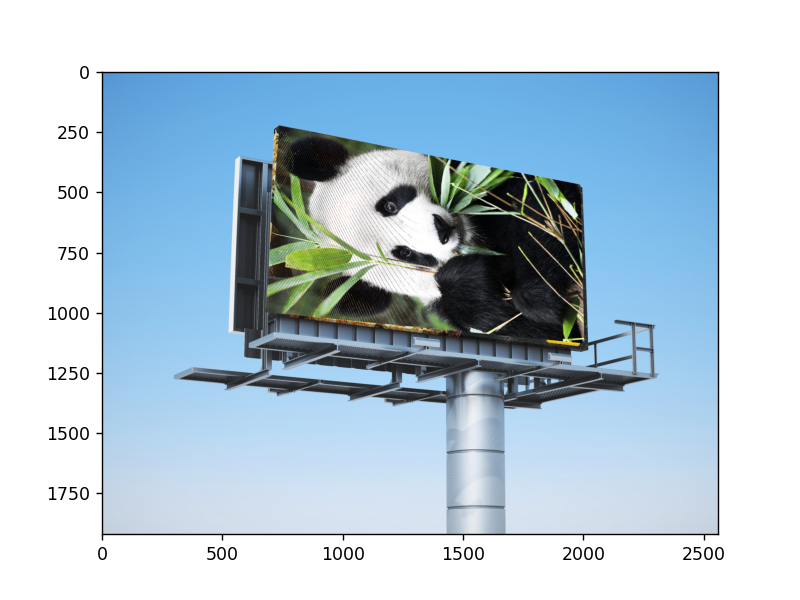

In [38]:
print('START')
destination = io.imread("static/billboard.jpg")
destination_height = destination.shape[0]
destination_width = destination.shape[1]

source = io.imread("static/83659.jpg")
source_height = source.shape[0]
source_width = source.shape[1] 

p1 = [(0, 0), (source_width, 0), (source_width, source_height), (0, source_height)]
H = estimate_homography(p1, p2)

for i in range(source_height):
    for j in range(source_width):
        # Generiranje nov piksel
        tt = np.array([[j], [i], [1]])
        tmp = np.dot(H, tt)
        # Normalizacija
        x1 = int(tmp[0]/tmp[2]) 
        y1 = int(tmp[1]/tmp[2])
        # Menjava ciljni piksel
        if x1>0 and y1>0 and y1 < destination_height and x1 < destination_width:
            destination[y1, x1, :] = source[i, j, :]

print('DONE')

plt.figure()
plt.imshow(destination)
plt.show()

Norma homografske matrike H

In [ ]:
np.linalg.norm(H)

Pogojenost homografske matrike H

In [ ]:
np.linalg.cond(H)

Rang je število linearno neodvisnih vrstic oziroma stolpcev. Linearna neodvisnost vrstic ali stolpcev pomeni, da se posamezne vrstice ali stolpci ne morejo izraziti z drugimi. Rang je tudi red največje neničelne kvadratne poddeterminante, ki pripada pravokotni matriki m x n

In [ ]:
print(f'V našem primeru rang homografske matrike H je: {np.linalg.matrix_rank(H)}')